# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [2]:
dim = 2
N = 1000
dtilde = 3
mp_deg = 4
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.H2SampletTree(pts, dtilde, mp_deg)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
spts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.0050351619720458984 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         1000
cluster splitting method: CardinalityBisection
bounding box diameter:    8.90435
number of clusters:       127
fill distance:            0.661189
separation radius:        0.0011158
min cluster discrepancy:  5.95e-04
max cluster discrepancy:  8.46e-02
mean cluster discrepancy: 2.13e-02
pt. mindist distribution: 
 4.90e-05|************************************
 1.47e-04|****************************************
 2.45e-04|**************
 3.43e-04|******
 4.41e-04|***
 5.39e-04|**
 6.37e-04|**
 7.35e-04|*
 8.33e-04|*
 9.31e-04|*
 1.03e-03|*
 1.13e-03|*
 1.23e-03|
 1.32e-03|*
 1.42e-03|*
discrepancy distribution: 
 7.01e-04|**
 9.76e-04|**
 1.36e-03|**
 1.89e-03|*
 2.63e-03|*
 3.66e-03|*****
 5.10e-03|*
 7.09e-03|*******
 9.87e-03|***************
 1.37e-02|****************************************
 1.91e-02|

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [3]:
start = time.time()
data = 2 * np.array(np.random.rand(N,10), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.0014939308166503906 sec.
relative error:  5.703168376832605e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

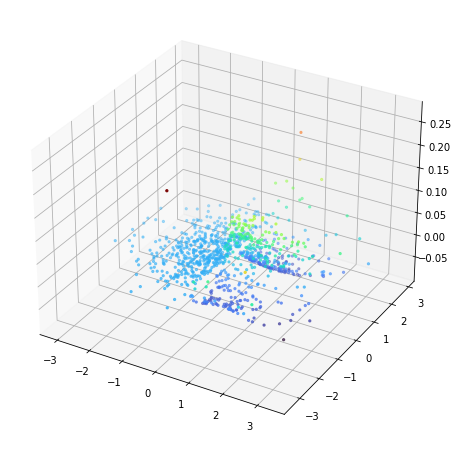

In [4]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(spts[0,:], spts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()

In [14]:
cov = FMCA.CovarianceKernel("exponential", 2)
start = time.time()
K = FMCA.sampletCompressKernel(cov, ST, pts, 0.8, 1e-1)
stop = time.time()
print('elapsed time samplet compressor: ', stop - start, 'sec.')

dtilde: 3 mpdeg: 4 eta: 8.00e-01 threshold: 1.00e-01
elapsed time samplet compressor:  0.04507589340209961 sec.


In [18]:
Chol = FMCA.PivotedCholesky(cov, spts, 1e-1)
L = Chol.matrixL()
Chol.computeFullPiv(cov, spts, 1e-1)
L2 = Chol.matrixL()

N: 1000 max number of cols: 1000 rel tol: 1.00e+02 initial trace: 1.00e+03
steps: 114 trace error: 9.99e+01
lambda min: 1.09e-03 lambda max: 4.70e+02 step: 39


In [19]:
K = cov.eval(spts,spts)
Keps = np.matmul(L, L.transpose())
Keps2 = np.matmul(L2, L2.transpose())
print(np.linalg.norm(K - Keps) / np.linalg.norm(K))
print(np.linalg.norm(K - Keps2) / np.linalg.norm(K))

0.017387284799910977
0.013136189387823356
